<a href="https://colab.research.google.com/github/OmkarSolat/Data-Science-in-DevTown/blob/main/DAY_40_Project_Linear_Regression(Predicting_House_Price).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project : Predicting House Price (Linear Regression)

# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

#Metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# House Price Dataset
from sklearn.datasets import fetch_california_housing

#For splitting Data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Problem Statement
* You have been given a dataset that describes the houses in Boston. Now, based on the given features, you have to predict the house price.

# Creating DataFrame

In [ ]:
housing = fetch_california_housing()
df = pd.DataFrame(housing.data , columns=housing.feature_names)

# EDA - Exploratory Data Analysis

In [ ]:
df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25

# Columns Information

* Adding the target column into the DataFrame

In [ ]:
#Target value-->PRICE
df['PRICE'] = housing.target

In [ ]:
df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  PRICE  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422

In [ ]:
df.tail()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  PRICE  
20635    -121.09  0.781  
20636    -121.21  0.771  
20637    -121.22  0.923  
20638    -121.32  0.847  
20639    -121.24  0.894

In [ ]:
df.shape

(20640, 9)

In [ ]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'PRICE'],
      dtype='object')

In [ ]:
df.dtypes

MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
PRICE         float64
dtype: object

In [ ]:
#Checking unique elements in each column
df.nunique()

MedInc        12928
HouseAge         52
AveRooms      19392
AveBedrms     14233
Population     3888
AveOccup      18841
Latitude        862
Longitude       844
PRICE          3842
dtype: int64

In [ ]:
#Total no. of missing/Null values
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
PRICE         0
dtype: int64

In [ ]:
#Statistical Information
df.describe()

MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude         PRICE  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.540000   -124.350000      0.149990  
25%        2.429741     33.930000   -121.800000      1.196000  
50%        2.818116     34.260000   -118.490000      1.797000  
75%        3.282261     37.710000   -118.010000      2.647250  
max     1243.333333     41.950000   -114.310000      5.000010

In [ ]:
# Correlation
df.corr()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc      1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766   
HouseAge   -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191   
AveRooms    0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852   
AveBedrms  -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181   
Population  0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863   
AveOccup    0.018766  0.013191 -0.004852  -0.006181    0.069863  1.000000   
Latitude   -0.079809  0.011173  0.106389   0.069721   -0.108785  0.002366   
Longitude  -0.015176 -0.108197 -0.027540   0.013344    0.099773  0.002476   
PRICE       0.688075  0.105623  0.151948  -0.046701   -0.024650 -0.023737   

            Latitude  Longitude     PRICE  
MedInc     -0.079809  -0.015176  0.688075  
HouseAge    0.011173  -0.108197  0.105623  
AveRooms    0.106389  -0.027540  0.151948  
AveBedrms   0.069721   0.013344 -0.046701  
Population -0.108785   0.099773 -0.024650  
AveOccup    0.002366   0.002476 -0.023737  
Latitude    1.000000  -0.924664 -0.144160  
Longitude  -0.924664   1.000000 -0.045967  
PRICE      -0.144160  -0.045967  1.000000

<Axes: >

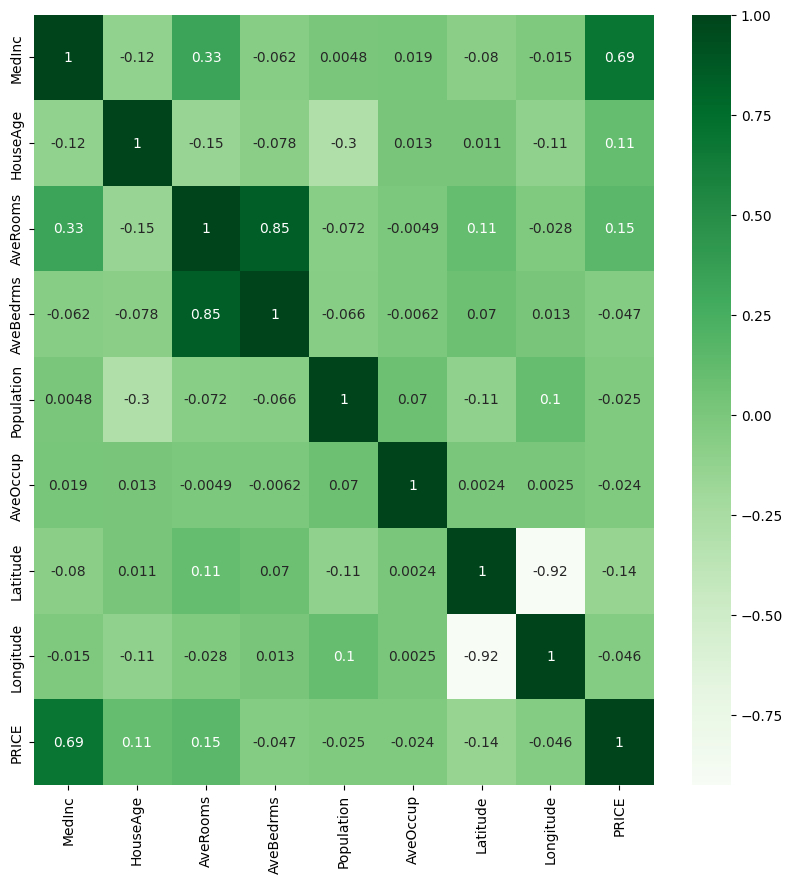

In [ ]:
#HeatMap
plt.figure(figsize=(10,10))
sns.heatmap(data=df.corr() ,annot=True , cmap='Greens')

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


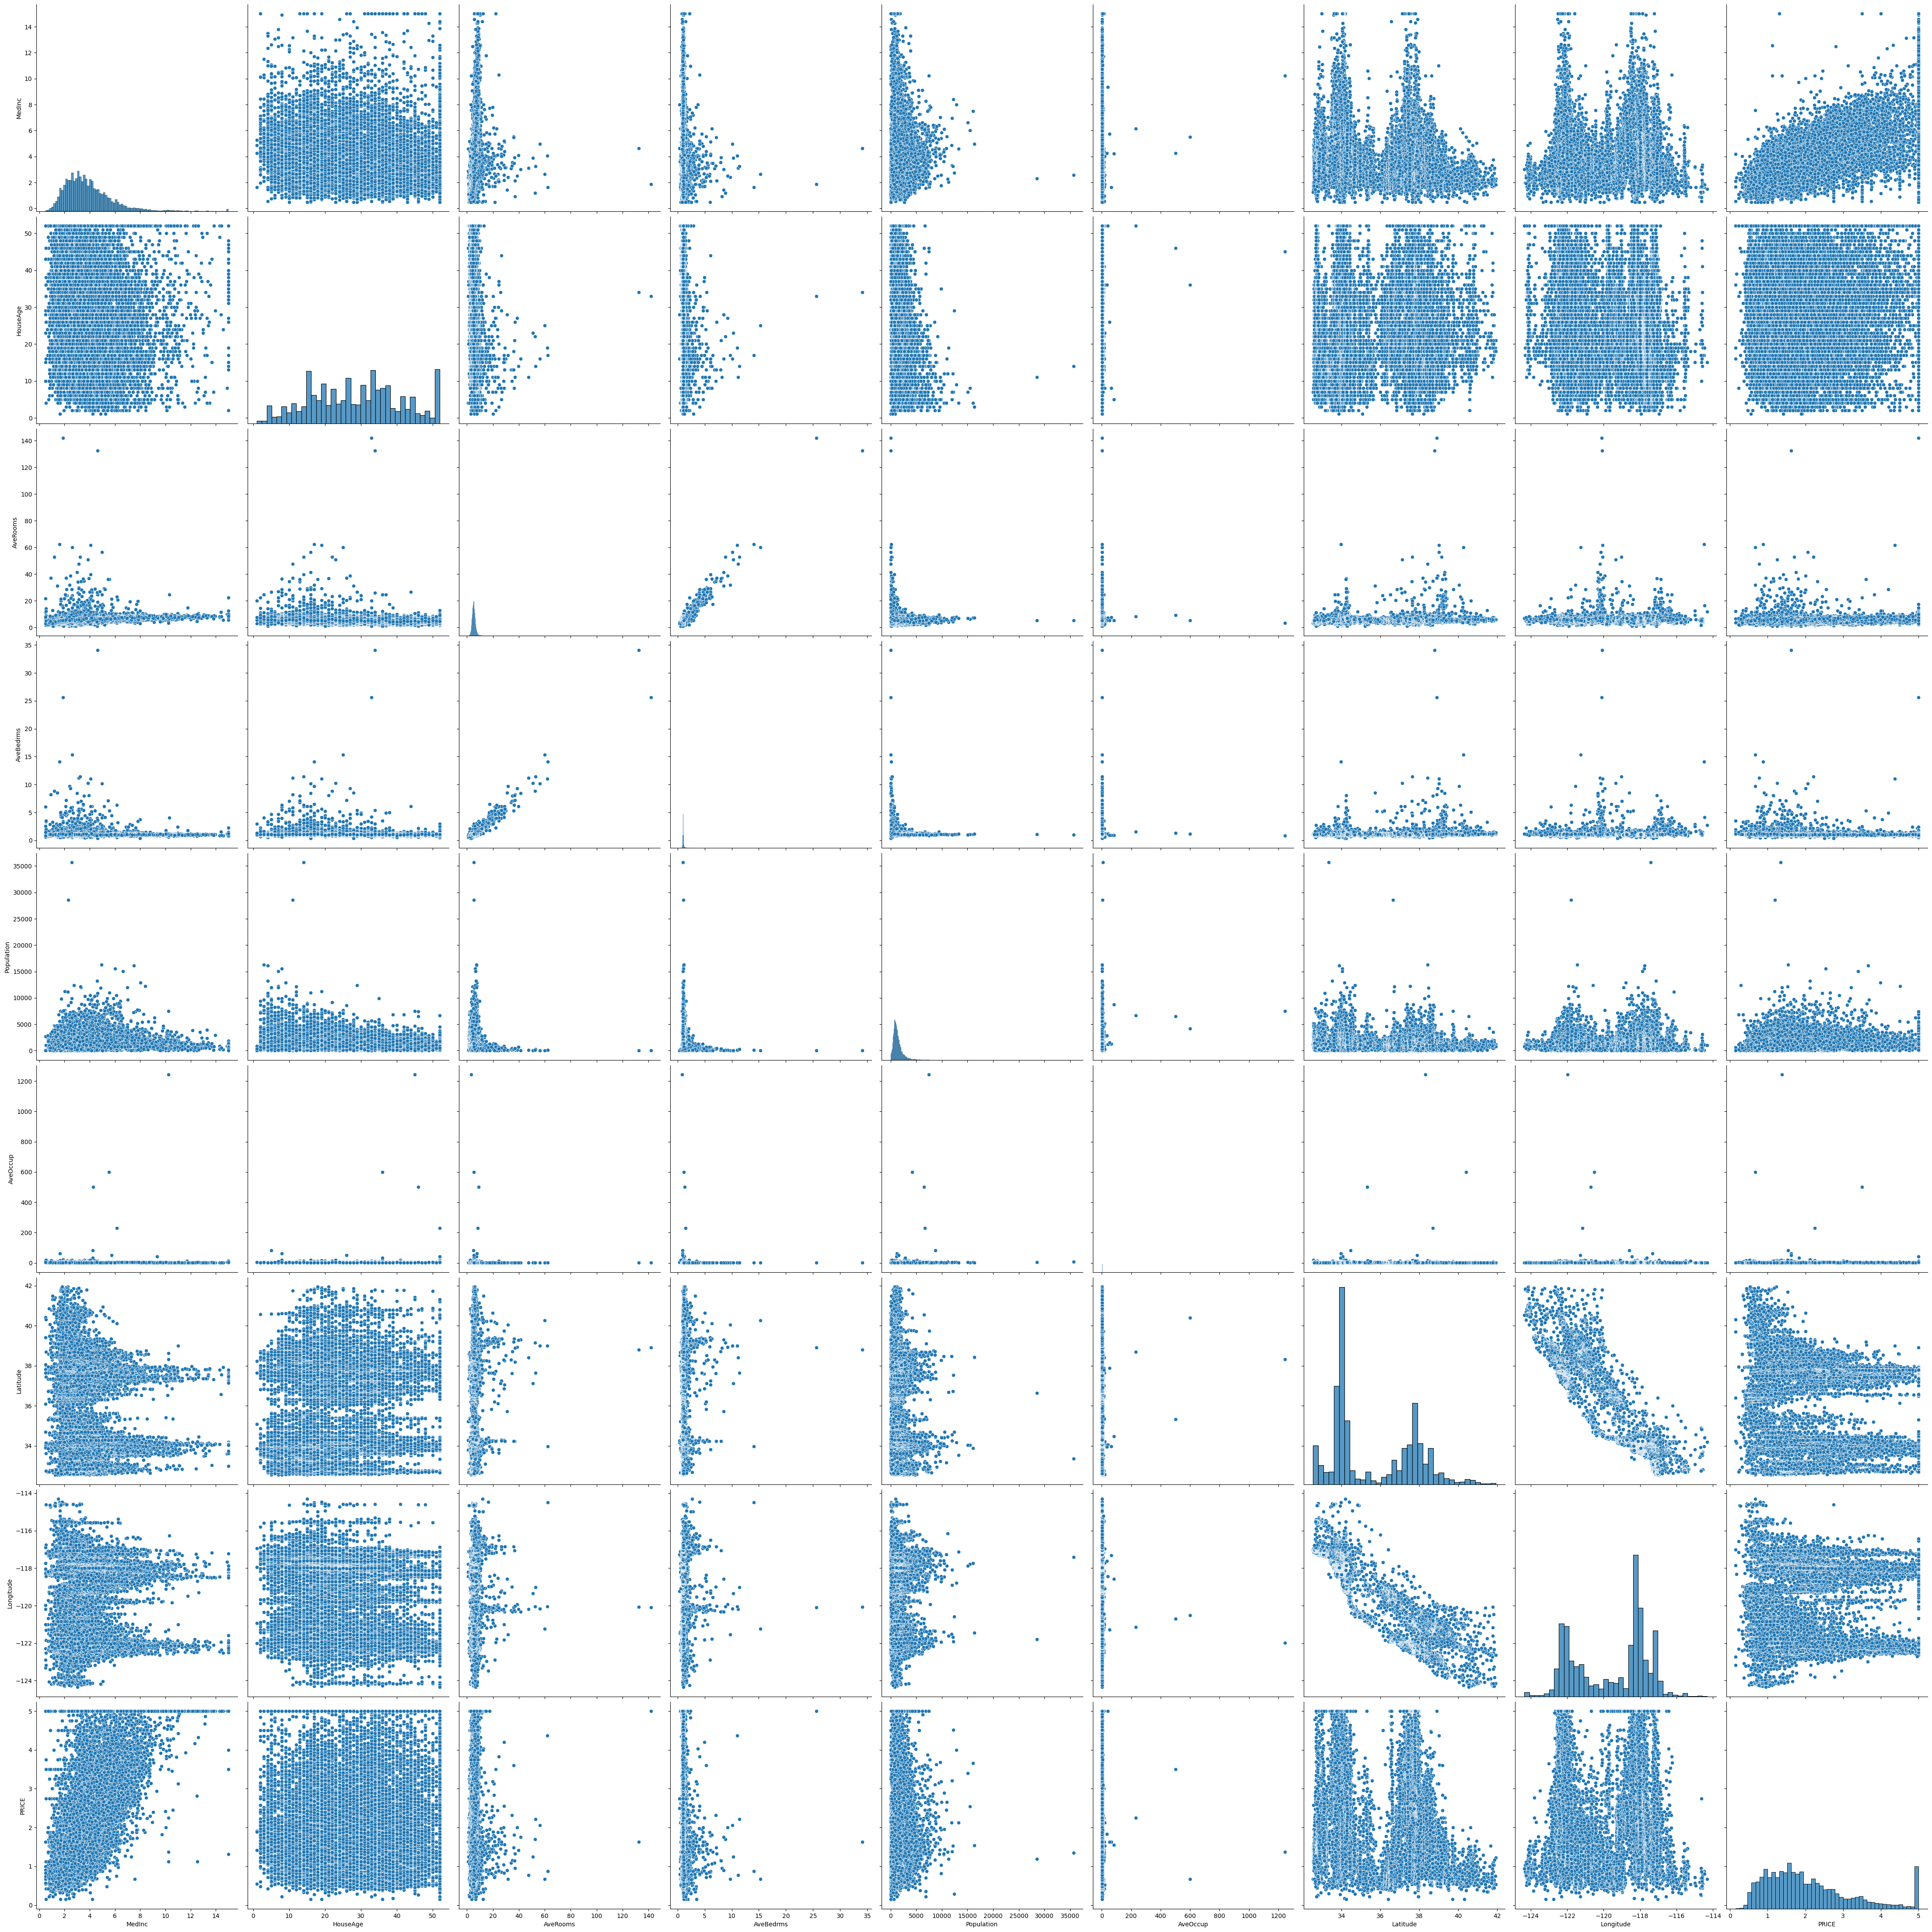

In [ ]:
#paiplot--->
sns.pairplot(df ,size=5)

<Axes: >

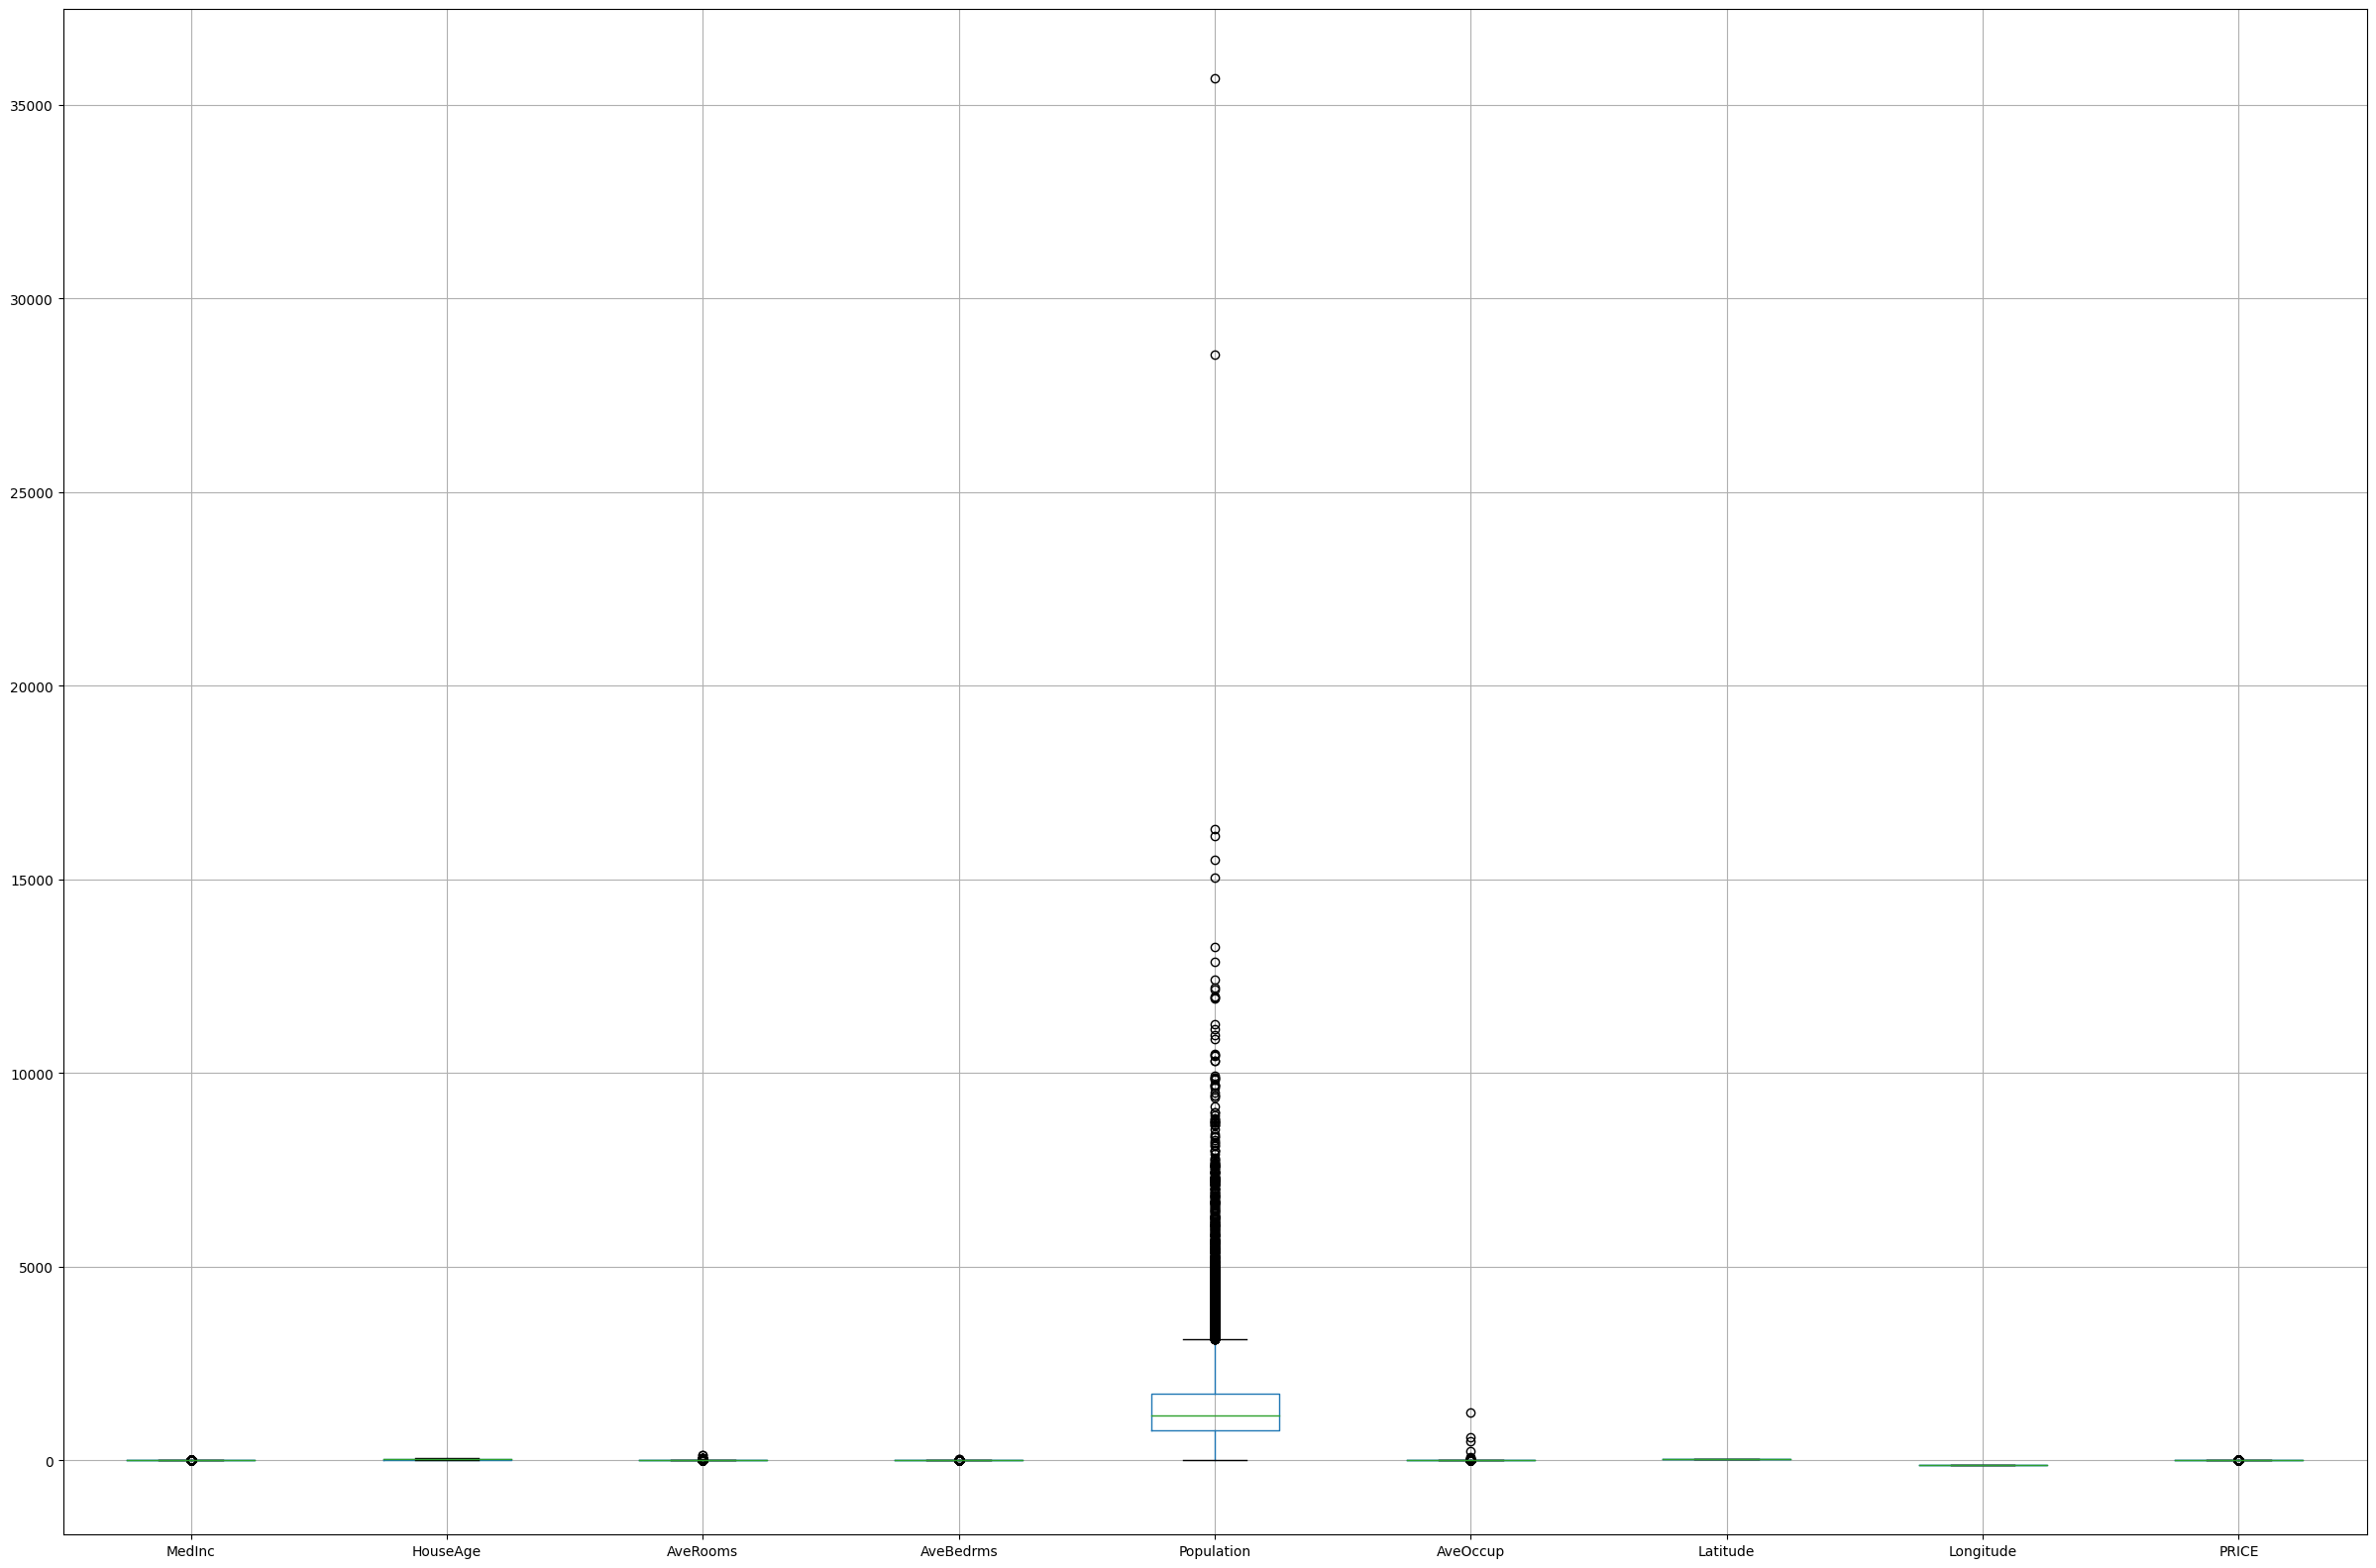

In [ ]:
#boxplot--->To get Outliers
plt.figure(figsize=(30,20))
df.boxplot()

In [ ]:
# Minimum PRICE
df.PRICE.min()

0.14999

In [ ]:
# Maximum PRICE
df.PRICE.max()

5.00001

In [ ]:
#Standard deviation
df.PRICE.std()

1.1539561587441387

# Machine Learning - (Linear Regression)

In [ ]:
df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  PRICE  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422

In [ ]:
X = np.array(df.drop('PRICE',axis=1))
y = np.array(df.PRICE)


# X = housing.data
# y = housing.target

# Splitting the Data ->(Train sets & Test sets)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
len(X_test)

4128

In [ ]:
len(y_test)

4128

In [ ]:
len(X_train)

16512

In [ ]:
len(y_train)

16512

# Choosing the Model

In [ ]:
model = LinearRegression()

# Fitting/Train the Model

In [ ]:
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
#Intercept Value
model.intercept_

-37.02327770606391

In [ ]:
#Coefficient value
model.coef_

array([ 4.48674910e-01,  9.72425752e-03, -1.23323343e-01,  7.83144907e-01,
       -2.02962058e-06, -3.52631849e-03, -4.19792487e-01, -4.33708065e-01])

# Prediction

In [ ]:
#Expected output
y_test

array([0.477  , 0.458  , 5.00001, ..., 5.00001, 0.723  , 1.515  ])

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred

array([0.71912284, 1.76401657, 2.70965883, ..., 4.46877017, 1.18751119,
       2.00940251])

# Testing the model Performance

In [ ]:
model.score(X_test,y_test)

0.5757877060324524

In [ ]:
# R-squared
r2_score(y_test,y_pred)

0.5757877060324524

In [ ]:
#MSE
mean_squared_error(y_test,y_pred)

0.5558915986952422

In [ ]:
#MAE
mean_absolute_error(y_test,y_pred)

0.533200130495698

In [ ]:
#RMSE
np.sqrt(mean_squared_error(y_test,y_pred))

0.7455813830127749

Text(0.5, 1.0, 'Actual Price V/S Predicted Price')

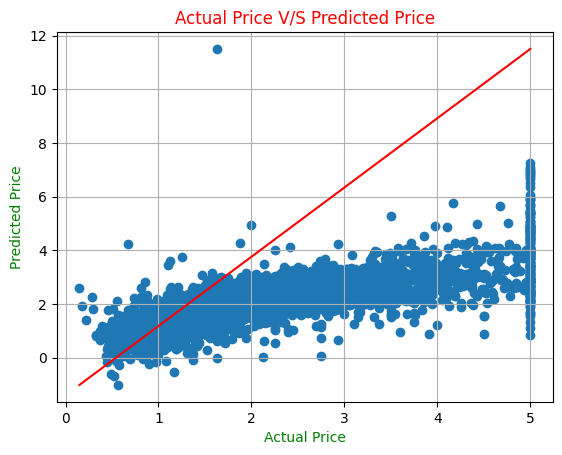

In [ ]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Price",color='g')
plt.ylabel("Predicted Price",color='g')
plt.plot([min(y_test),max(y_test)],[min(y_pred),max(y_pred)], color='red')
plt.grid()
plt.title("Actual Price V/S Predicted Price",color='r')


# klib Library

* Klib is an open-source Python library that provides a collection of functions for data analysis and visualization. It is designed to simplify the data analysis process and provide a user-friendly interface for common data tasks, such as data profiling, data cleaning, data visualization, and data summarization.


* Pypi: https://pypi.org/project/klib/
* https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/train.csv

In [ ]:
!pip install klib

In [ ]:
import klib
import pandas as pd
from sklearn.datasets import load_diabetes, load_iris

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/train.csv')

GridSpec(6, 5)

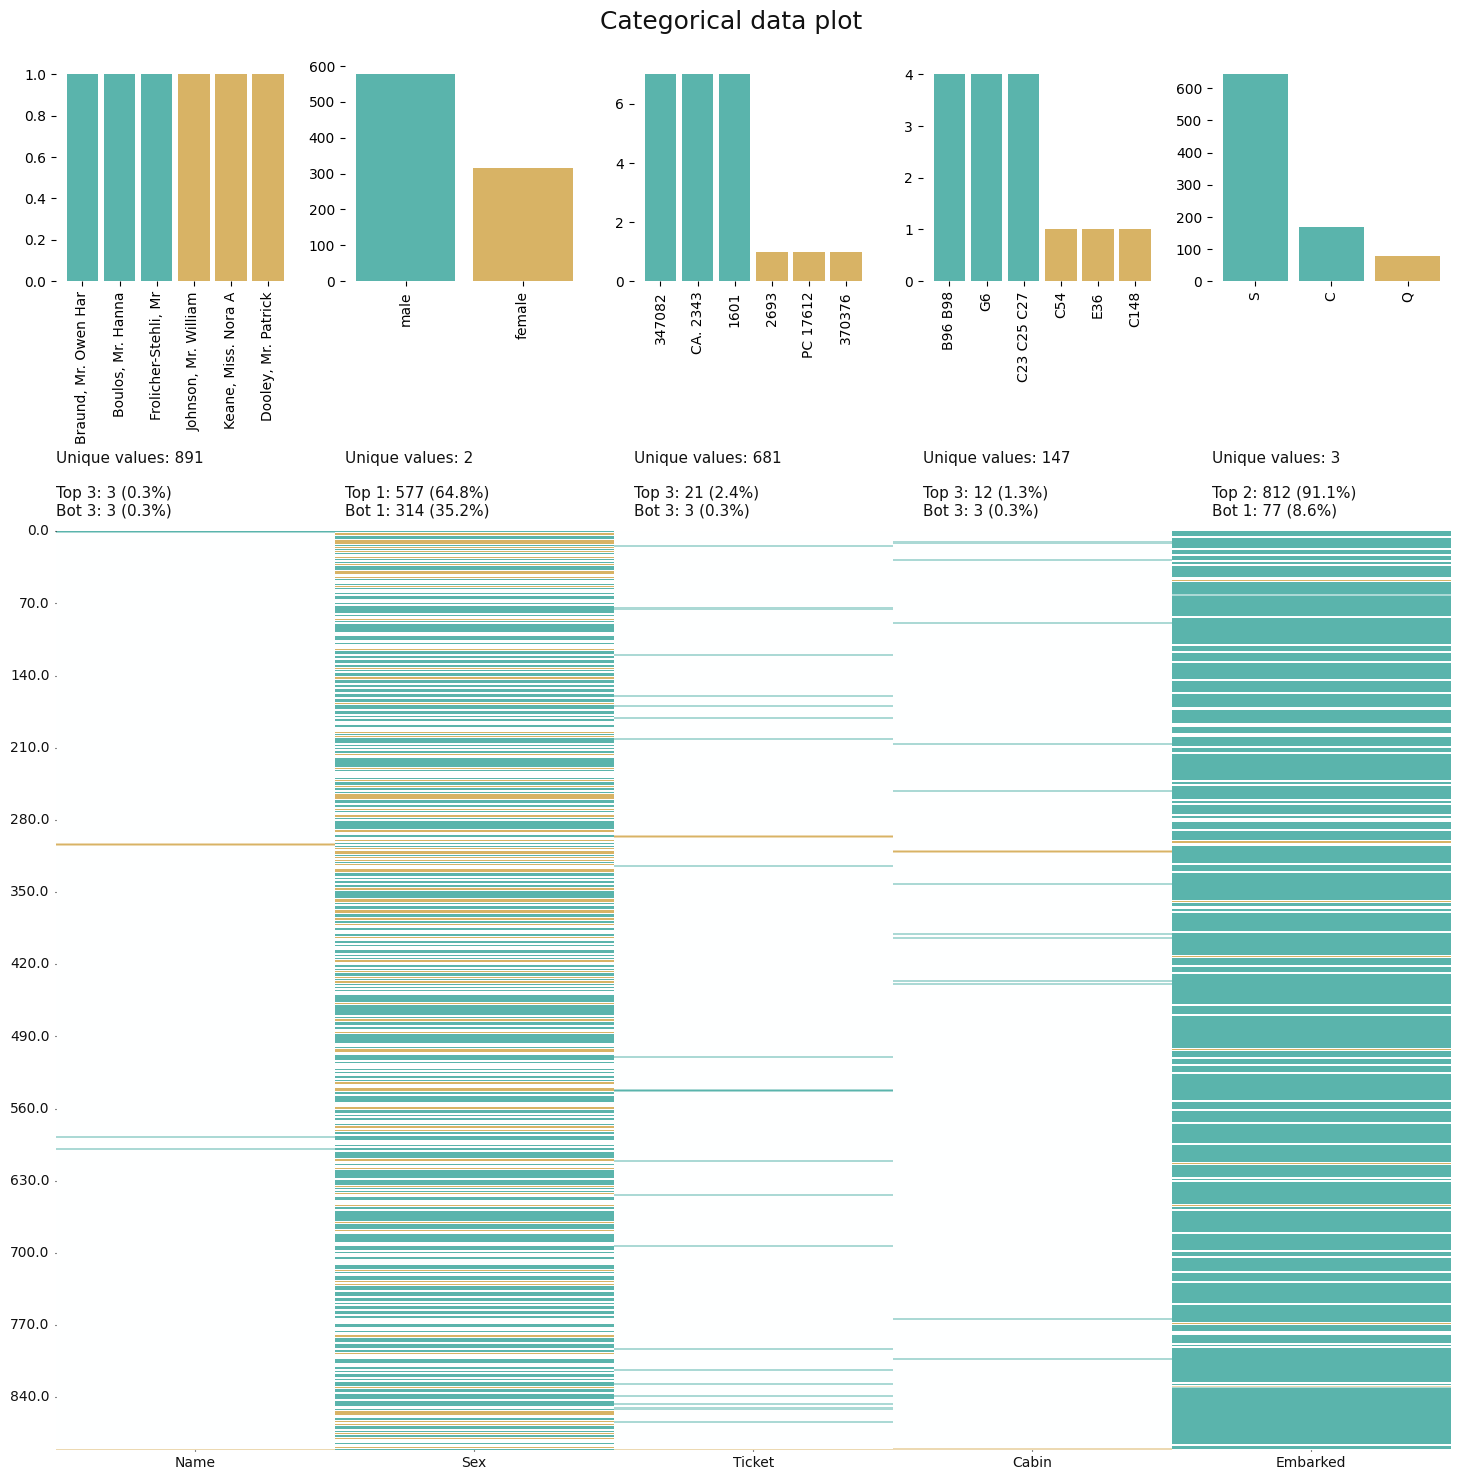

In [ ]:
klib.cat_plot(df)
# returns a visualization of the number and frequency of categorical features

In [ ]:
klib.corr_mat(df)
 # returns a color-encoded correlation matrix

<Axes: title={'center': 'Feature-correlation (pearson)'}>

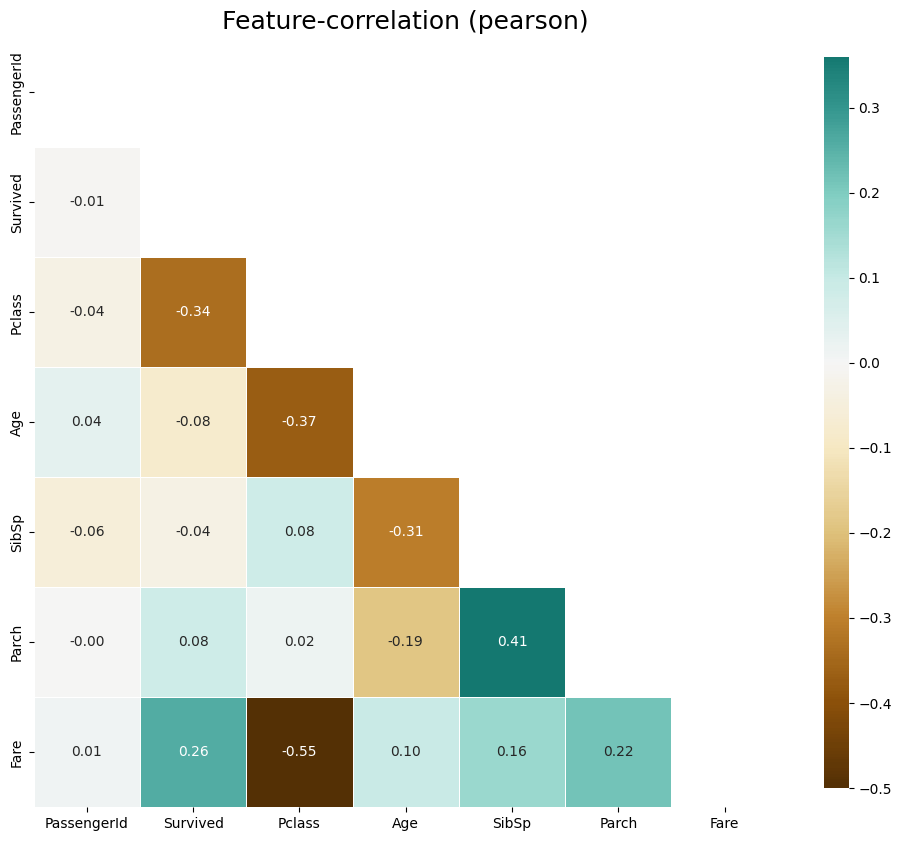

In [ ]:
klib.corr_plot(df)
# returns a color-encoded heatmap, ideal for correlations

<Axes: xlabel='PassengerId', ylabel='Density'>

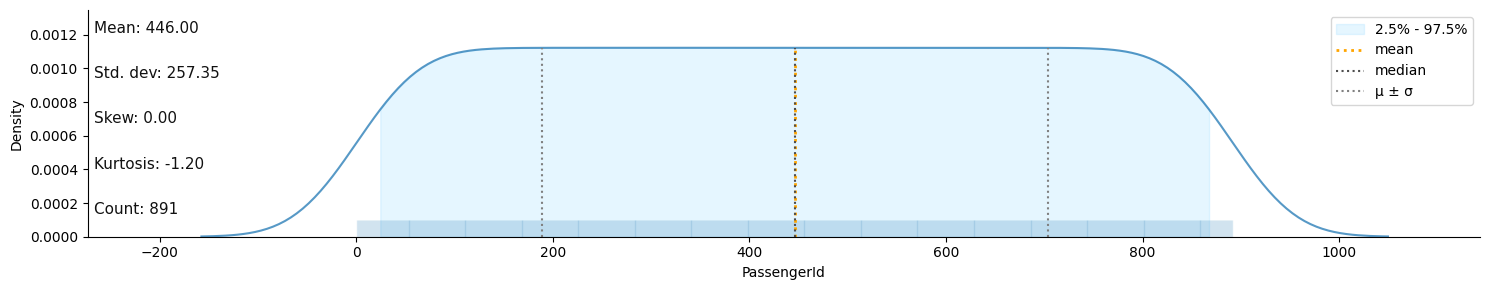

In [ ]:
klib.dist_plot(df)
# returns a distribution plot for every numeric feature

GridSpec(6, 6)

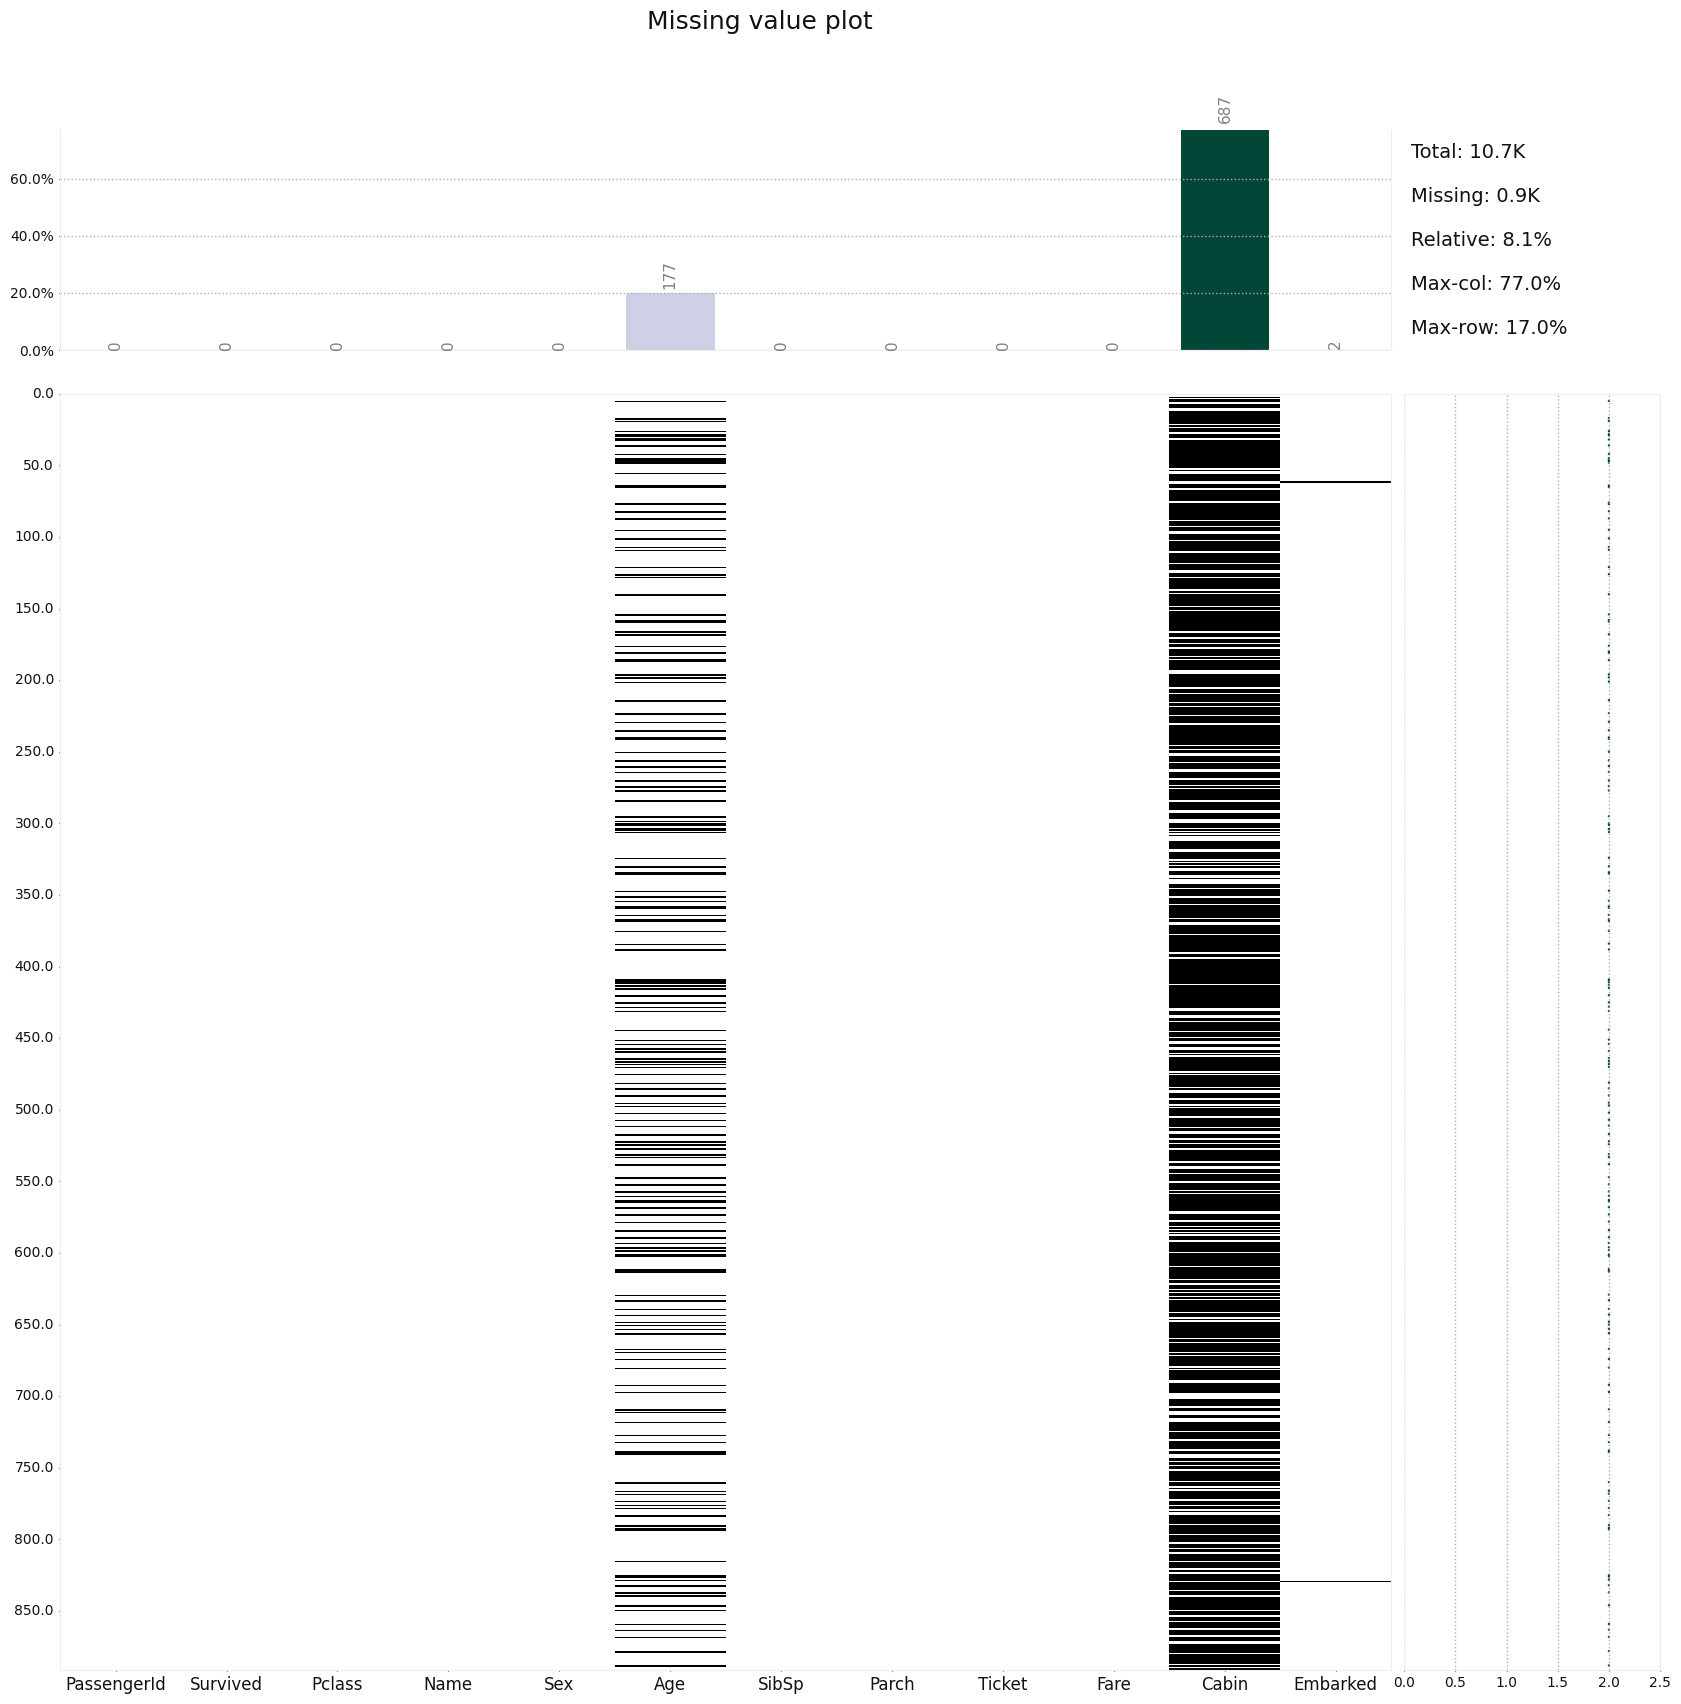

In [ ]:
klib.missingval_plot(df)
# returns a figure containing information about missing values

In [ ]:
klib.clean
# functions for cleaning datasets

<module 'klib.clean' from '/usr/local/lib/python3.10/dist-packages/klib/clean.py'>

In [ ]:
klib.data_cleaning(df)
# performs datacleaning (drop duplicates & empty rows/cols, adjust dtypes,...)

Shape of cleaned data: (891, 12) - Remaining NAs: 866


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.05 MB (-62.5%)



passenger_id  survived  pclass  \
0               1         0       3   
1               2         1       1   
2               3         1       3   
3               4         1       1   
4               5         0       3   
..            ...       ...     ...   
886           887         0       2   
887           888         1       1   
888           889         0       3   
889           890         1       1   
890           891         0       3   

                                                  name     sex   age  sib_sp  \
0                              Braund, Mr. Owen Harris    male  22.0       1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0       1   
2                               Heikkinen, Miss. Laina  female  26.0       0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0       1   
4                             Allen, Mr. William Henry    male  35.0       0   
..                                                 ...     ...   ...     ...   
886                              Montvila, Rev. Juozas    male  27.0       0   
887                       Graham, Miss. Margaret Edith  female  19.0       0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN       1   
889                              Behr, Mr. Karl Howell    male  26.0       0   
890                                Dooley, Mr. Patrick    male  32.0       0   

     parch            ticket       fare cabin embarked  
0        0         A/5 21171   7.250000  <NA>        S  
1        0          PC 17599  71.283302   C85        C  
2        0  STON/O2. 3101282   7.925000  <NA>        S  
3        0            113803  53.099998  C123        S  
4        0            373450   8.050000  <NA>        S  
..     ...               ...        ...   ...      ...  
886      0            211536  13.000000  <NA>        S  
887      0            112053  30.000000   B42        S  
888      2        W./C. 6607  23.450001  <NA>        S  
889      0            111369  30.000000  C148        C  
890      0            370376   7.750000  <NA>        Q  

[891 rows x 12 columns]

In [ ]:
klib.clean_column_names(df)
# cleans and standardizes column names, also called inside data_cleaning()

passenger_id  survived  pclass  \
0               1         0       3   
1               2         1       1   
2               3         1       3   
3               4         1       1   
4               5         0       3   
..            ...       ...     ...   
886           887         0       2   
887           888         1       1   
888           889         0       3   
889           890         1       1   
890           891         0       3   

                                                  name     sex   age  sib_sp  \
0                              Braund, Mr. Owen Harris    male  22.0       1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0       1   
2                               Heikkinen, Miss. Laina  female  26.0       0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0       1   
4                             Allen, Mr. William Henry    male  35.0       0   
..                                                 ...     ...   ...     ...   
886                              Montvila, Rev. Juozas    male  27.0       0   
887                       Graham, Miss. Margaret Edith  female  19.0       0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN       1   
889                              Behr, Mr. Karl Howell    male  26.0       0   
890                                Dooley, Mr. Patrick    male  32.0       0   

     parch            ticket     fare cabin embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [ ]:
 klib.convert_datatypes(df)
 # converts existing to more efficient dtypes, also called inside data_cleaning()

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket       Fare Cabin Embarked  
0        0         A/5 21171   7.250000  <NA>        S  
1        0          PC 17599  71.283302   C85        C  
2        0  STON/O2. 3101282   7.925000  <NA>        S  
3        0            113803  53.099998  C123        S  
4        0            373450   8.050000  <NA>        S  
..     ...               ...        ...   ...      ...  
886      0            211536  13.000000  <NA>        S  
887      0            112053  30.000000   B42        S  
888      2        W./C. 6607  23.450001  <NA>        S  
889      0            111369  30.000000  C148        C  
890      0            370376   7.750000  <NA>        Q  

[891 rows x 12 columns]

In [ ]:
klib.drop_missing(df)
# drops missing values, also called in data_cleaning()

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [ ]:
klib.mv_col_handling(df)
# drops features with high ratio of missing vals based on informational content

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Embarked  
0        0         A/5 21171   7.2500        S  
1        0          PC 17599  71.2833        C  
2        0  STON/O2. 3101282   7.9250        S  
3        0            113803  53.1000        S  
4        0            373450   8.0500        S  
..     ...               ...      ...      ...  
886      0            211536  13.0000        S  
887      0            112053  30.0000        S  
888      2        W./C. 6607  23.4500        S  
889      0            111369  30.0000        C  
890      0            370376   7.7500        Q  

[891 rows x 11 columns]

In [ ]:
klib.mv_col_handling(df)
# drops features with high ratio of missing values based on informational content


PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Embarked  
0        0         A/5 21171   7.2500        S  
1        0          PC 17599  71.2833        C  
2        0  STON/O2. 3101282   7.9250        S  
3        0            113803  53.1000        S  
4        0            373450   8.0500        S  
..     ...               ...      ...      ...  
886      0            211536  13.0000        S  
887      0            112053  30.0000        S  
888      2        W./C. 6607  23.4500        S  
889      0            111369  30.0000        C  
890      0            370376   7.7500        Q  

[891 rows x 11 columns]

In [ ]:
klib.pool_duplicate_subsets(df)
 # pools subset of cols based on duplicates with min. loss of information

PassengerId                                               Name   Age  \
0              1                            Braund, Mr. Owen Harris  22.0   
1              2  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0   
2              3                             Heikkinen, Miss. Laina  26.0   
3              4       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0   
4              5                           Allen, Mr. William Henry  35.0   
..           ...                                                ...   ...   
886          887                              Montvila, Rev. Juozas  27.0   
887          888                       Graham, Miss. Margaret Edith  19.0   
888          889           Johnston, Miss. Catherine Helen "Carrie"   NaN   
889          890                              Behr, Mr. Karl Howell  26.0   
890          891                                Dooley, Mr. Patrick  32.0   

               Ticket  pooled_vars  
0           A/5 21171            0  
1            PC 17599            1  
2    STON/O2. 3101282            2  
3              113803            3  
4              373450            4  
..                ...          ...  
886            211536          134  
887            112053          887  
888        W./C. 6607          888  
889            111369          889  
890            370376          116  

[891 rows x 5 columns]

In [ ]:
df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [ ]:
#
'''
- klib.clean - # functions for cleaning datasets
- klib.data_cleaning(df) # performs datacleaning (drop duplicates & empty rows/cols, adjust dtypes,...)
- klib.clean_column_names(df) # cleans and standardizes column names, also called inside data_cleaning()
- klib.convert_datatypes(df) # converts existing to more efficient dtypes, also called inside data_cleaning()
- klib.drop_missing(df) # drops missing values, also called in data_cleaning()
- klib.mv_col_handling(df) # drops features with high ratio of missing vals based on informational content
- klib.pool_duplicate_subsets(df) # pools subset of cols based on duplicates with min. loss of information
'''